In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
datos = pd.read_csv("Iris.csv")

#borrar columna id
datos = datos.drop('Id', axis=1) # 1 columnas y 0 para filas

#Muestra las 5 primeras filas
print(datos.head())
#caracteristicas basicas  estadisticas
print(datos.describe())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000 

La exactitud es:  0.9666666666666667


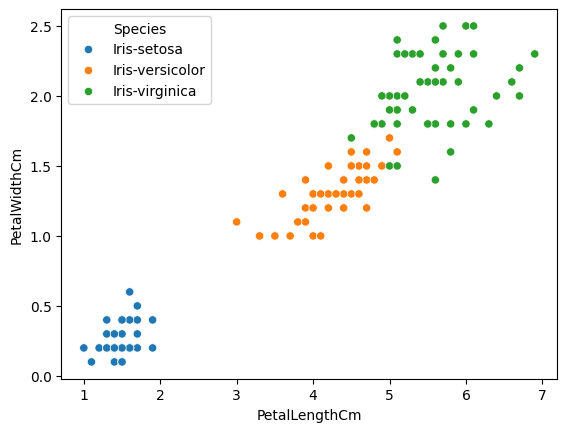

Clasificacion de la flor:  ['Iris-setosa']
0.010627070923336274 SepalLengthCm
0.0 SepalWidthCm
0.05053936590272612 PetalLengthCm
0.9388335631739376 PetalWidthCm


c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


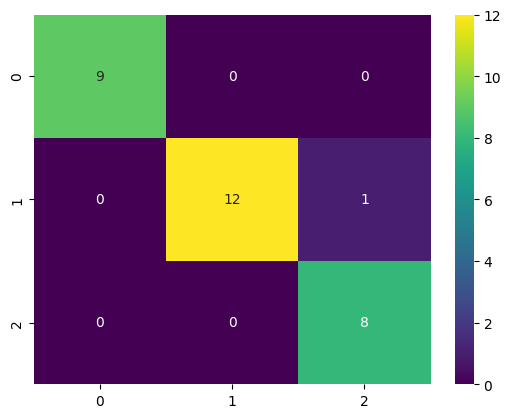

In [16]:
#Dividir los datos en conjunto de entrenamiento y prueba y son etiquetas
x=datos.iloc[:,:-1] #todas las columnas menos la ultima
y=datos.iloc[:,-1] #ultima columna

#Dividir los datros en conjunto de entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=25)

#Crear modelo con arbol de decision
modelo=DecisionTreeClassifier()

#Entrenar modelo
modelo.fit(x_train, y_train)

#Probar el odelo con los datos de prueba
y_obt=modelo.predict(x_test)

#Evaluar el modelo con las metricas de exactitud 
exactitud = accuracy_score(y_test, y_obt)
print("La exactitud es: ",exactitud)

#metrica
Matrix_confusion = confusion_matrix(y_test, y_obt)

#Crear mapa de calor de la matriz de confusion
import seaborn as sns

#grafica
sns.scatterplot(data=datos, x="PetalLengthCm",y="PetalWidthCm",hue="Species")
plt.show()

sns.heatmap(Matrix_confusion,annot = True, fmt = 'd', cmap="viridis")
plt.show

#Realizar una nueva prediccion 
flor= modelo.predict([[4.5,3.2,1.6,0.3]])
print("Clasificacion de la flor: ",flor)

#obtener la importancia de las caracteriticas
importancia = modelo.feature_importances_

#obtener los nombres de las caracterisitcas 
nombres=datos.columns.tolist()

#imprimir la importancia de cada caracteristica

for nombre_carc, impt in zip(importancia,nombres):
    print(nombre_carc, impt)


